# Exploration

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

#### Load Data to Pandas Dataframe

In [4]:
data1 = pd.read_json('../data/file0-555.json', orient='columns')

In [5]:
data2 = pd.read_json('../data/file1137-3025.json', orient='columns')

In [6]:
data3 = pd.read_json('../data/file556-1136.json', orient='columns')

In [7]:
data = pd.concat([data1, data2, data3])

#### Explore datasets

In [8]:
len(data) == len(data3) + len(data2) + len(data1)

True

In [9]:
data.describe()

,duration,index_,magnitude,project,repetitions
count,1474748.0,1.474748e+06,1.474748e+06,1.261569e+06,1474748.0
mean,0.0,7.373751e+05,1.746123e+01,1.369494e+03,1.0
std,0.0,4.257236e+05,1.783508e+01,2.715116e+03,0.0
min,0.0,1.000000e+00,0.000000e+00,4.000000e+00,1.0
25%,0.0,3.686878e+05,1.000000e+00,1.014000e+03,1.0
50%,0.0,7.373755e+05,1.000000e+00,1.014000e+03,1.0
75%,0.0,1.106062e+06,3.900000e+01,1.014000e+03,1.0
max,0.0,1.474749e+06,4.000000e+01,2.065500e+04,1.0


#### Group By Project_Id 

In [10]:
projects = data.groupby('project')['profile'].nunique().reset_index()
projects = projects.rename(index=str, columns={"profile": "num_profiles"})
len(projects)

1783

In [11]:
projects.describe()

,project,num_profiles
count,1783.000000,1783.000000
mean,7622.996635,56.131800
std,8602.336996,910.048491
min,4.000000,1.000000
25%,664.500000,4.000000
50%,1386.000000,9.000000
75%,17996.500000,24.000000
max,20655.000000,37059.000000


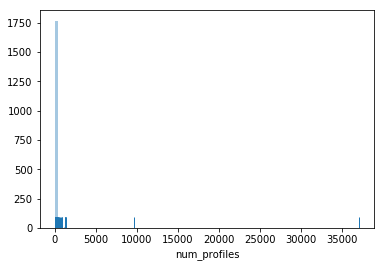

In [12]:
sns.distplot(projects['num_profiles'], bins=100, kde=False, rug=True)

So, clearly we have a small number (probably two) projects that are huge outliers. So let's remove them from the dataset and graph again

In [13]:
projects.sort_values(by=['num_profiles'], ascending=False)[0:5]

,project,num_profiles
10,25.0,37059
80,169.0,9609
1267,17491.0,1356
1168,16864.0,1343
23,38.0,1302


Ok, so it looks like project 25 and project 169 are the two projects that have been hit the most. I should look into why this is (TODO) but first of all, I will just remove them from the dataset to graph the remainder of the projects.

In [14]:
projects_subset = projects[projects['project'] != 25.0]
projects_subset = projects[projects['project'] != 169.0]

In [15]:
len(projects_subset)

1782

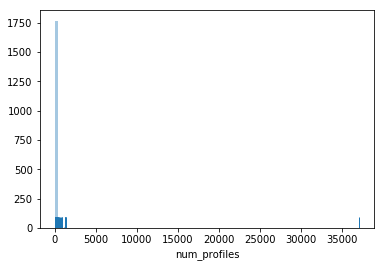

In [16]:
sns.distplot(projects_subset['num_profiles'], bins=100, kde=False, rug=True)

So we can see that the majority of the projects (>50%) have fewer than 10 'interactions' in this dataset

#### Explore the Extra Field

In [17]:
data[data['extra'] != ''].describe()

,duration,index_,magnitude,project,repetitions
count,221939.0,2.219390e+05,221939.0,15004.000000,221939.0
mean,0.0,8.243350e+05,1.0,3621.975540,1.0
std,0.0,4.280549e+05,0.0,6615.147331,0.0
min,0.0,1.605000e+03,1.0,7.000000,1.0
25%,0.0,4.897865e+05,1.0,421.000000,1.0
50%,0.0,8.162760e+05,1.0,421.000000,1.0
75%,0.0,1.207700e+06,1.0,421.000000,1.0
max,0.0,1.474748e+06,1.0,18005.000000,1.0


#### Explore the type field

In [18]:
interaction_types = data.groupby('type')['project'].agg('count').reset_index()
interaction_types = interaction_types.rename(index=str, columns={"project": "num_interactions"})

In [19]:
interaction_types

,type,num_interactions
0,Added a bookmark,24177
1,Added to dashboard,15281
2,Asked a question,32
3,Bookmarked the project,24917
4,Classification / Transcription,719976
5,Clicked to join the project,37271
6,Data collection,11963
7,Joined the project,82906
8,Marked themselves a participant,3216
9,Negate previous event,2708


Note that there are some negation actions e.g. "negate previous event", "removed a bookmark", "removed from dashboard".

TODO: Should I use one-hot encoding for these?

#### Group by profile

In [20]:
profile = data.groupby('profile')['project'].agg('count').reset_index()
profile = profile.rename(index=str, columns={"project": "num_interactions"})

In [21]:
profile.describe()

,num_interactions
count,76382.000000
mean,16.516575
std,1116.981989
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,237724.000000


This is a bit concerning. It looks like the VAST majority of our users only have 2 or fewer interactions

In [22]:
ordered_profile = profile.sort_values('num_interactions', ascending=True).reset_index()

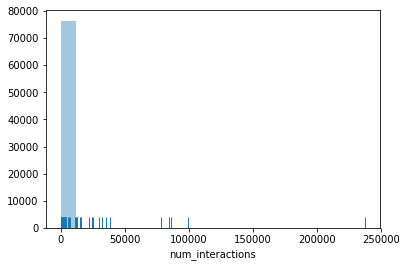

In [23]:
sns.distplot(ordered_profile['num_interactions'], bins=20, kde=False, rug=True)